In [1]:
# Import Packages

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
#style.use('ggplot')


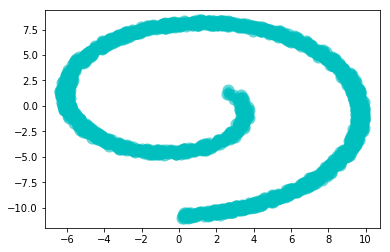

In [4]:
X = np.loadtxt("Synthetic Data/class1.txt")

plt.scatter(X[: , 0], X[:, 1], s=50, c = 'c', marker = 'o', linewidths = 5, zorder = 10, alpha = 0.6)
plt.show()  

In [5]:
from sklearn import metrics
from scipy.spatial.distance import cdist

#### Determine K from KMeans

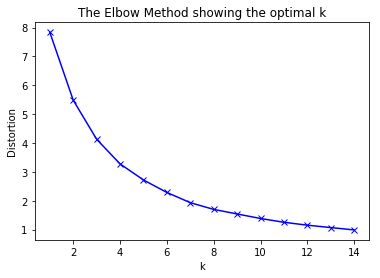

In [6]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

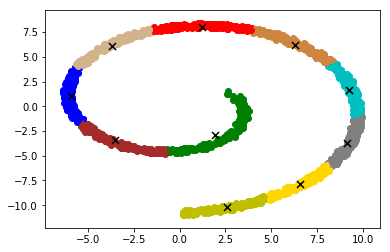

In [8]:
cluster_size = 10
clf = KMeans(n_clusters = cluster_size)
clf.fit(X)

# Gives the final cetnroids of each cluster
centroids = clf.cluster_centers_

# Label of each data-point
labels = clf.labels_


colors = 10*["g", "r", "c", "b", "y","gray", "brown", "tan", "gold", "peru", "tomato", "aqua"]
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c = colors[labels[i]], marker = 'o')

plt.scatter(centroids[:, 0], centroids[:, 1], c= 'k', marker = 'x', s = 50,  zorder = 10)
plt.show()  

In [9]:
clusters = {}

#initialize
for i in range(cluster_size):
    clusters[i] = []

for i,j in zip(X, labels):
    clusters[j].append(i)

for i in clusters:
    clusters[i] = np.array(clusters[i])

In [157]:
# covariance
np.cov(np.transpose(clusters[0]))

array([[ 0.05682369, -0.05745897],
       [-0.05745897,  2.22190063]])

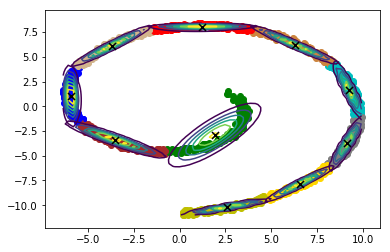

In [10]:
# Our 2-dimensional distribution will be over variables X and Y
N = 60
xs = np.linspace(min(X[:,0]), max(X[:,0]), N)
ys = np.linspace(min(X[:,1]), max(X[:,1]), N)
xs, ys = np.meshgrid(xs, ys)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(xs.shape + (2,))
pos[:, :, 0] = xs
pos[:, :, 1] = ys

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# Mean vector and covariance matrix
for index in range(cluster_size):
    mu = centroids[index]
    Sigma = np.cov(np.transpose(clusters[index]))

    # The distribution on the variables X, Y packed into pos.
    Z = multivariate_gaussian(pos, mu, Sigma)

    plt.contour(xs, ys, Z)

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c = colors[labels[i]], marker = 'o')
plt.scatter(centroids[:, 0], centroids[:, 1], c= 'k', marker = 'x', s = 50,  zorder = 10)    
plt.show()

In [107]:
mix = 10*[.1]

In [ ]:
pi_1 = mix[0]
mu_1 = centroids[0]
cov_1 = np.cov(np.transpose(clusters[0]))

In [126]:
from scipy.stats import multivariate_normal

tmp = np.zeros([X.shape[0], cluster_size])

for i in range(cluster_size):
    mean = centroids[i]
    cov = np.cov(np.transpose(clusters[i]))
    U = (X - np.mean(X)) / np.std(X)
    tmp[:, i] = mix[i]*multivariate_normal.pdf(U, mean, cov)

In [158]:
gamma = np.zeros([X.shape[0], cluster_size])

#for i, j in ([X.shape[0], cluster_size]):

for i in range(X.shape[0]):
    for j in range(cluster_size):
        gamma[i][j] = tmp[i][j] / sum(tmp[i, :])

In [160]:
# Calculate new means
np.seterr(divide='ignore', invalid='ignore')

for k in range(cluster_size):
    nr = np.array([0,0])
    for n in range(X.shape[0]):
        nr = nr + gamma[n][0] * X[n]
    
    centroids[k] =  nr / sum(gamma[:, k])

In [161]:
centroids

array([[ nan,  nan],
       [  0.,   0.],
       [ nan,  nan],
       [ nan,  nan],
       [  0.,   0.],
       [  0.,   0.],
       [ nan,  nan],
       [  0.,   0.],
       [ nan,  nan],
       [  0.,   0.]])